In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [7]:
N = 10000
BINS = 200

## Exercise 2.1
Sample from Weibull using only uniform.

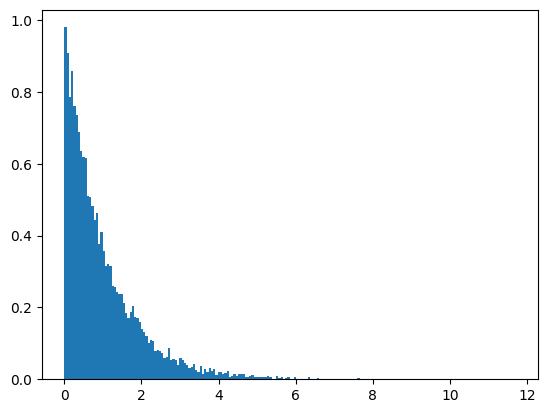

In [8]:
## Sampling from exponential
def exp_sampler(n, lambd=1):
    rng = np.random.default_rng()
    u = np.array(rng.random(n))
    return -np.log(1-u)/lambd


exps = exp_sampler(N)

plt.hist(exps, bins=BINS, density=True);

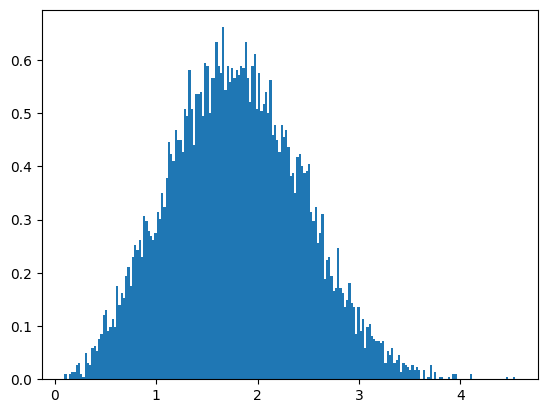

In [9]:
## Sampling from Weibull
alpha = 2
beta = 3
weib = alpha * exps**(1/beta)

plt.hist(weib, bins=BINS, density=True);

### Exercise 2.5
Implement `Gamma(alpha, 1)` and `Beta(alpha, beta)` samplers using the exponential sampler.

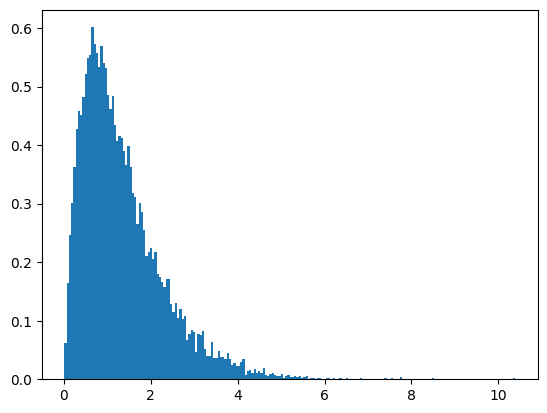

In [12]:
def gamma_sampler(n, alpha):
    ret = []
    rng = np.random.default_rng()
    while len(ret) < n:
        x = exp_sampler(1, 1)[0]
        u = rng.random(1)[0]
        if u <= (x / alpha) ** (alpha - 1) * np.exp((1/alpha - 1) * x + alpha - 1):
            ret.append(x)

    return np.array(ret)

gamma = gamma_sampler(N, 2)
plt.hist(gamma, bins=BINS, density=True);

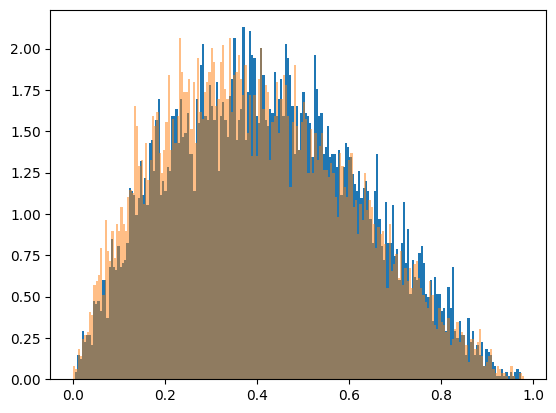

In [15]:
def beta_sampler(n, alpha, beta):
    gamma1 = gamma_sampler(n, alpha)
    gamma2 = gamma_sampler(n, beta)
    return gamma1 / (gamma1 + gamma2)

beta = beta_sampler(N, 2, 3)
plt.hist(beta, bins=BINS, density=True);
plt.hist(stats.beta.rvs(2, 3, size=N), bins=BINS, density=True, alpha=0.5);